In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import twint
import nest_asyncio


%matplotlib inline

In [3]:
nest_asyncio.apply()

In [9]:
t = twint.Config()
t.Username = "YahooSportsNBA"
t.Since = '2021-01-31'
t.Pandas = True
twint.run.Search(t)

1371523338527444993 2021-03-15 14:07:00 -0400 <YahooSportsNBA> The @WNBA unveiled a new logo to celebrate its 25th anniversary 👀 #CountIt   https://t.co/vJwBnTPf7F
1371516350213029896 2021-03-15 13:39:14 -0400 <YahooSportsNBA> 🔘 JaVale McGee getting interest from the Nets 🔘 What's going on with DeMar DeRozan? 🔘 Nurk returning soon?   More notes from @ChrisBHaynes in Hoopla with Haynes ➡️  https://t.co/WyjsDGXVcE  https://t.co/r5yXvEatqR
1371286088405385216 2021-03-14 22:24:15 -0400 <YahooSportsNBA> ANOTHER DAY, ANOTHER ANTHONY EDWARDS JAM 💥   https://t.co/w96pJBWhUT
1371278872881336320 2021-03-14 21:55:35 -0400 <YahooSportsNBA> Jayson Tatum made this look too easy 👀   https://t.co/MyxA5l6b77
1371263992836943874 2021-03-14 20:56:27 -0400 <YahooSportsNBA> Jaylen faked 'em out 😂   https://t.co/MNMHPc0qFA
1371254793176375302 2021-03-14 20:19:54 -0400 <YahooSportsNBA> Ben Simmons with authority 🔨  (via @sixers)   https://t.co/CMlevDT3dv
1371242774528466945 2021-03-14 19:32:08 -0400 <YahooSp

1364892898911686658 2021-02-25 06:00:00 -0400 <YahooSportsNBA> "KD is the best player in the world right now."  @LaJethroJenkins and Seerat Sohi break down the red-hot Nets and which teams could potentially matchup best with them.
1364799134708867073 2021-02-24 23:47:25 -0400 <YahooSportsNBA> Spida too tough 😬  (via @utahjazz)   https://t.co/XNpGEU0ies
1364759455544406021 2021-02-24 21:09:44 -0400 <YahooSportsNBA> Myles says 🚫   https://t.co/6VciNRYd03
1364748956891234304 2021-02-24 20:28:01 -0400 <YahooSportsNBA> Anthony Edwards is sooo mean to the rims 😳   https://t.co/74enz4puOw
1364748302957219843 2021-02-24 20:25:25 -0400 <YahooSportsNBA> Gallo showing off the range 🎯   https://t.co/vPUvwO4Xtn
1364687975511183363 2021-02-24 16:25:42 -0400 <YahooSportsNBA> Fans logging on when they think their team got disrespected on national TV games...  https://t.co/9UwQjJ8A5Q
1364675723395403777 2021-02-24 15:37:01 -0400 <YahooSportsNBA> The NBA released the second half of the 2021 schedule.   

1359224066096443397 2021-02-09 14:34:05 -0400 <YahooSportsNBA> After 11 seasons, @ReneeMontgomery is retiring to focus on her social justice work in Atlanta.  ➡️  https://t.co/1Z63bp8bop  https://t.co/6pP4oAt3ob
1358988145140797443 2021-02-08 22:56:37 -0400 <YahooSportsNBA> Holy Murray 😱   https://t.co/8T4xggYYUO
1358973403214999568 2021-02-08 21:58:02 -0400 <YahooSportsNBA> Anthony Edwards got up 😤   https://t.co/97I4VqQukq
1358944748271140864 2021-02-08 20:04:10 -0400 <YahooSportsNBA> The typically old school Kevin Garnett was unexpectedly complimentary of today’s NBA 👀  ➡️  https://t.co/Tj2ZBB248Q  https://t.co/S25EEzg10v
1358895865566486531 2021-02-08 16:49:56 -0400 <YahooSportsNBA> "Racism is taught."  Donovan Mitchell and Rudy Gobert called out a Utah school for initially allowing parents to opt their students out of Black History Month curriculum.   ➡️  https://t.co/eaOm0nIwSg  https://t.co/et2OyFL6Pv
1358888071119450118 2021-02-08 16:18:57 -0400 <YahooSportsNBA> "You didn't los

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [10]:
df = twint.storage.panda.Tweets_df

In [11]:
df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1371523338527444993,1371523338527444993,1.615832e+12,2021-03-15 14:07:00,-0400,,The @WNBA unveiled a new logo to celebrate its...,en,[countit],[],...,,,,,,[],,,,
1,1371516350213029896,1371516350213029896,1.615830e+12,2021-03-15 13:39:14,-0400,,🔘 JaVale McGee getting interest from the Nets ...,en,[],[],...,,,,,,[],,,,
2,1371286088405385216,1371286088405385216,1.615775e+12,2021-03-14 22:24:15,-0400,,"ANOTHER DAY, ANOTHER ANTHONY EDWARDS JAM 💥 h...",en,[],[],...,,,,,,[],,,,
3,1371278872881336320,1371278872881336320,1.615773e+12,2021-03-14 21:55:35,-0400,,Jayson Tatum made this look too easy 👀 https...,en,[],[],...,,,,,,[],,,,
4,1371263992836943874,1371263992836943874,1.615770e+12,2021-03-14 20:56:27,-0400,,Jaylen faked 'em out 😂 https://t.co/MNMHPc0qFA,en,[],[],...,,,,,,[],,,,


In [16]:
test_str = df.loc[4,'tweet']
encoded_test_str = test_str.encode('ascii', "ignore")
decoded_test_str = encoded_test_str.decode()
decoded_test_str

"Jaylen faked 'em out    https://t.co/MNMHPc0qFA"

In [5]:
def create_tweets_dataframe(username, start_date, end_date):
    c = twint.Config()
    c.Username = username
    c.Since = start_date
    c.Until = end_date
    c.Pandas = True
    c.Hide_output = True
    twint.run.Search(c)
    
    dataframe = twint.storage.panda.Tweets_df
    return dataframe
    
    
    

In [6]:
yahoo_df = create_tweets_dataframe('YahooSportsNBA', '2016-01-01', '2021-02-28')
yahoo_df.to_csv('yahoo.csv',index=False)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [7]:
crossover_df = create_tweets_dataframe('TheCrossover', '2016-01-01', '2021-02-28')
crossover_df.to_csv('crossover.csv',index=False)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [8]:
athletic_df = create_tweets_dataframe('TheAthleticNBA', '2016-01-01', '2021-02-28')
athletic_df.to_csv('athletic.csv',index=False)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [9]:
slam_df = create_tweets_dataframe('Slamnewswire', '2016-01-01', '2021-02-28')
slam_df.to_csv('slam.csv',index=False)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [9]:
#nba_df = create_tweets_dataframe('NBA', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [10]:
bball_news_df = create_tweets_dataframe('basketbllnews', '2016-01-01', '2021-02-28')
bball_news_df.to_csv('bball_news.csv', index=False)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [11]:
sb_nation_df = create_tweets_dataframe('SBNationNBA', '2016-01-01', '2021-02-28')
sb_nation_df.to_csv('sb_nation.csv', index=False)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [12]:
hoopshype_df = create_tweets_dataframe('hoopshype', '2016-01-01', '2021-02-28')
hoopshype_df.to_csv('hoopshype.csv', index=False)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [13]:
sum([len(yahoo_df), 
 len(crossover_df), 
 len(athletic_df), 
 len(slam_df), 
 len(sb_nation_df), 
 len(bball_news_df), 
 len(hoopshype_df)])

128619

In [12]:
nba_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [14]:
df_list = [yahoo_df, crossover_df, athletic_df, slam_df, bball_news_df, sb_nation_df, hoopshype_df]
for dataframe in df_list:
    dataframe.drop(columns=['id', 'conversation_id', 'created_at', 'timezone', 'place',
       'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], inplace=True)

In [16]:
yahoo_df['source'] = 'Yahoo'
crossover_df['source'] = 'SI'
athletic_df['source'] = 'The Athletic'
slam_df['source'] = 'Slam'
#nba_df['source'] = 'NBA'
bball_news_df['source'] = 'Basketball News'
sb_nation_df['source'] = 'SB Nation'
hoopshype_df['source'] = 'HoopsHype'

In [17]:
twitter_df = pd.concat([yahoo_df, crossover_df, athletic_df, sb_nation_df, 
                        hoopshype_df, slam_df, bball_news_df], ignore_index=True)

In [18]:
pd.set_option('display.max_colwidth', 100)
twitter_df.head()

,date,tweet,source
0,2021-02-26 12:35:27,"Obi Toppin is expected to participate in the NBA Slam Dunk Contest, per @ShamsCharania. 👀 https...",Yahoo
1,2021-02-25 23:08:17,MPJ SLAM 💥 https://t.co/bp6XsbTzUT,Yahoo
2,2021-02-25 17:48:50,Timberwolves G Malik Beasley has been suspended for 12 games due to conduct stemming from charge...,Yahoo
3,2021-02-25 13:40:20,Luka's game-winner against the Celtics vs. Luka's game-winner against the Clippers. Unreal 🤯 ...,Yahoo
4,2021-02-25 13:10:50,It's time to stop underrating the Utah Jazz 👀 From @KrystenPeek ⤵️,Yahoo


In [19]:
pd.set_option("display.max_rows", 101)
twitter_df.sample(n=100)

,date,tweet,source
54633,2016-12-15 08:30:23,Re-picking the 2014 NBA draft with @andrewsharp and @BenGolliver: https://t.co/1W187RruLG http...,SI
63485,2016-02-18 09:08:15,Dwight for Brook? Rudy to the Clips? @Jeremy_Woo offers five (crazy) trades he wants to see htt...,SI
63803,2016-02-09 14:26:50,50 greatest NBA players in history 3. Wilt Chamberlain 2. Kareem Abdul-Jabbar 1. MJ https://t...,SI
31420,2018-08-20 22:38:04,"Zion Williamson is making his case as Duke's best player, pound for pound https://t.co/qnwqMqfv...",SI
62694,2016-03-11 20:43:37,Wayne Selden is mad he wasn’t in @andrewsharp’s Mock Draft https://t.co/45meds7dgD https://t.c...,SI
52097,2017-02-20 16:30:12,Your one-stop shop for everything #NBAAllStar Weekend https://t.co/WOjaHEyRTp https://t.co/RKn...,SI
21133,2019-05-23 17:45:00,Is Kevin Durant really undecided still on where he wants to play next season? Watch more on SI ...,SI
114935,2017-03-16 07:27:22,Ball. https://t.co/kP9r36dUj9,HoopsHype
109223,2017-10-22 17:21:01,Michael Jordan in video games through the years. https://t.co/Kq8rpVf3Bu,HoopsHype
46127,2017-08-07 02:07:04,The Rockets believe they’ve ‘closed the gap’ this summer. Will their experiment pay off? https:...,SI


In [88]:
from bs4 import BeautifulSoup
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import KElbowVisualizer

In [21]:
def clean_tweets(text):
    """This function takes in a string (in this case a tweet) and cleans the string such that any and all
    non-ASCII charcaters and HTML characters references are removed.
    
    The string will still have all forms of punctuation.
    
    """
    text = re.sub(' +', ' ', text) #reduce instances of multiple blank spaces to a single space
    text = re.sub(r"http\S+", '', text) #remove links from tweets
    encoded_text = text.encode('ascii', 'ignore') #encode string using 'ascii' encoding
    decode_text = encoded_text.decode() #decode string (convert from bytes to string object)
    text_reclean = re.sub(' +', ' ', decode_text) #reduce instances of multiple blank spaces to a single space
    clean_text = BeautifulSoup(text_reclean, 'lxml').text #remove all html encodings such as &amp;, &quot;, etc.
    
    return clean_text

In [22]:
twitter_df['tweet'] = twitter_df['tweet'].apply(lambda x: clean_tweets(x))

In [23]:
def clean_tweets_modeling(text):
    """Performs a similar operation as the clean_tweets function except this function will create a list of 
    tokens that can be used for NLP modeling.
    
    For example, a tweet will be transformed such that all non-ASCII characters and HTML encodings are removed.
    Then the function will remove all punctuation from the tweet, split each word in the tweet by white space,
    and finally lemmatize each word in the tweet and group the lemmatized tokens in a list."""
    
    text = re.sub(' +', ' ', text) #reduce instances of multiple spaces to a single space
    encoded_text = text.encode('ascii', 'ignore') #encode text as ascii characters only
    decode_text = encoded_text.decode() #convert bytes back to a string
    clean_text = BeautifulSoup(decode_text, 'lxml').text #remove html tages using BeautifulSoup
    
    no_punc_text = "".join([word for word in clean_text if word not in string.punctuation]) #remove punctuation
    tokens = re.split('\W+', no_punc_text) #split words by in no_punc_text variable by whitespace
    
    #Lemmatize each token and store tokens in a list
    final_tokens = [wnl.lemmatize(word) for word in tokens if word not in stopwords]
    
    return final_tokens

In [24]:
twitter_df['tweet_tokens'] = twitter_df['tweet'].apply(lambda x: clean_tweets_modeling(x.lower()))

In [295]:
twitter_df = twitter_df.loc[twitter_df['tweet'] != '']

In [297]:
len(twitter_df)

126927

In [25]:
twitter_df.sample(n=100)

,date,tweet,source,tweet_tokens
126045,2020-09-24 15:43:20,"""Its a disappointment. We feel like weve taken a step back, that we havent made the progress we ...",Slam,"[disappointment, feel, like, weve, taken, step, back, havent, made, progress, seeking, frustrati..."
74109,2018-04-19 21:30:27,name a more iconic duo ( @KevinGarnett5KG),SB Nation,"[name, iconic, duo, kevingarnett5kg, ]"
4353,2019-06-08 01:01:54,Kawhi was asked what an NBA title would mean for Canada and he said youll really have to ask som...,Yahoo,"[kawhi, asked, nba, title, would, mean, canada, said, youll, really, ask, somebody, street, via,..."
47605,2017-06-21 14:36:38,2017 NBA Mock Draft: @JeremyWoo dissects these crazy trade rumors and projects all 60 picks,SI,"[2017, nba, mock, draft, jeremywoo, dissects, crazy, trade, rumor, project, 60, pick, ]"
78730,2017-04-20 07:05:00,"Paul George said the reaction to his comments was ""complete ignorance""",SB Nation,"[paul, george, said, reaction, comment, complete, ignorance, ]"
3062,2019-10-28 14:08:39,Jarrett Culver goes off @Timberwolves rookie @jarrettc08 talks about his celebrity crush and whi...,Yahoo,"[jarrett, culver, go, timberwolves, rookie, jarrettc08, talk, celebrity, crush, player, want, gu..."
119321,2016-08-26 20:32:06,Column: The top takeaways from Free Agency 2016.,HoopsHype,"[column, top, takeaway, free, agency, 2016, ]"
50330,2017-04-15 14:22:01,Which first-round series will be the most entertaining? @RohanNadkarni ranks every matchup,SI,"[firstround, series, entertaining, rohannadkarni, rank, every, matchup, ]"
87705,2020-11-20 11:54:19,Clippers interested in Terry Rozier?,HoopsHype,"[clipper, interested, terry, rozier, ]"
28337,2018-11-13 12:45:08,Kemba Walker and the best trade pieces in the NBA (by @MShap2),SI,"[kemba, walker, best, trade, piece, nba, mshap2, ]"


In [299]:
def tfidf_vectorizer(dataframe):
    
    tfidf = TfidfVectorizer(stop_words=stopwords)
    tfidf_sparse_mat = tfidf.fit_transform(dataframe['tweet'])
    
    tfidf_df = pd.DataFrame(tfidf_sparse_mat.toarray())
    tfidf_df.columns = tfidf.get_feature_names()
    
    return tfidf_df

In [300]:
twitter_tfidf_df = tfidf_vectorizer(twitter_df)

In [26]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
twitter_sparse_mat = vectorizer.fit_transform(twitter_df['tweet'])

In [27]:
twitter_sparse_mat.shape

(128619, 33623)

In [89]:
from sklearn.decomposition import TruncatedSVD


In [29]:
pca_1000 = TruncatedSVD(n_components=1000, random_state=23)
vec_matrix_pca_1000 = pca_1000.fit_transform(twitter_sparse_mat)

In [30]:
pca_100 = TruncatedSVD(n_components=100, random_state=23)
vec_matrix_pca_100 = pca_100.fit_transform(twitter_sparse_mat)

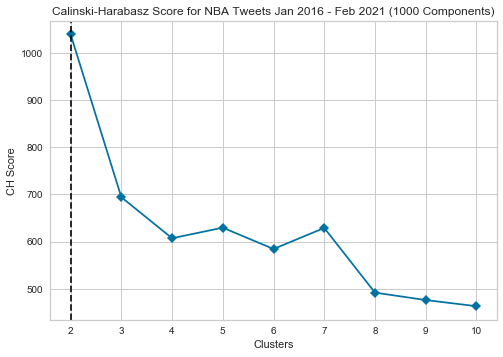

In [32]:
kmodel = KMeans(random_state=23)
tweet_viz = KElbowVisualizer(kmodel, k=(2,11), metric = 'calinski_harabasz', timings=False)
tweet_viz.fit(vec_matrix_pca_1000)
plt.title('Calinski-Harabasz Score for NBA Tweets Jan 2016 - Feb 2021 (1000 Components)')
plt.xlabel('Clusters')
plt.ylabel('CH Score')
plt.savefig('twitter_ch_plot_1000.png')

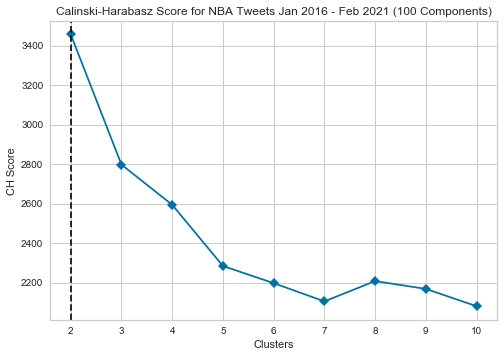

In [33]:
kmodel = KMeans(random_state=23)
tweet_viz_100 = KElbowVisualizer(kmodel, k=(2,11), metric = 'calinski_harabasz', timings=False)
tweet_viz_100.fit(vec_matrix_pca_100)
plt.title('Calinski-Harabasz Score for NBA Tweets Jan 2016 - Feb 2021 (100 Components)')
plt.xlabel('Clusters')
plt.ylabel('CH Score')
plt.savefig('twitter_ch_plot_100pca.png')

In [51]:
from collections import Counter

## 2 Clusters

In [34]:
kmeans_two = KMeans(n_clusters=2, random_state=123)
kmeans_two.fit(vec_matrix_pca_100)
twitter_df['dual_labels'] = kmeans_two.labels_

In [35]:
twitter_df['dual_labels'].value_counts()

1    102779
0     25840
Name: dual_labels, dtype: int64

In [36]:
twitter_df.loc[twitter_df['dual_labels'] == 0].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels
110701,2017-08-22 19:32:54,Kyrie Irving to Celtics: NBA media reaction on Twitter.,HoopsHype,"[kyrie, irving, celtic, nba, medium, reaction, twitter, ]",0
123531,2016-03-08 12:05:49,Research: Which NBA legends were surrounded by the most star power?,HoopsHype,"[research, nba, legend, surrounded, star, power, ]",0
59632,2016-06-02 21:16:01,John Legend for #NBAFinals MVP (via @NBA),SI,"[john, legend, nbafinals, mvp, via, nba, ]",0
102372,2018-07-11 14:52:00,1999 NBA re-draft: The way it should have been.,HoopsHype,"[1999, nba, redraft, way, ]",0
121430,2016-06-05 14:30:11,"The top playoff scorers of each NBA franchise. (Yes, Richard Hamilton ahead of Isiah Thomas).",HoopsHype,"[top, playoff, scorer, nba, franchise, yes, richard, hamilton, ahead, isiah, thomas, ]",0
102830,2018-06-27 02:07:03,"He is basketball's Picasso, and this season was his masterpiece. Congrats to NBA MVP James Harden.",HoopsHype,"[basketball, picasso, season, masterpiece, congrats, nba, mvp, james, harden, ]",0
43910,2017-10-17 23:50:43,Gordon Haywards injury casts dark cloud over NBA Opening Night (by @RohanNadkarni),SI,"[gordon, haywards, injury, cast, dark, cloud, nba, opening, night, rohannadkarni, ]",0
24356,2019-02-21 14:34:47,Three matchups to watch as the NBA returns from All-Star Weekend,SI,"[three, matchup, watch, nba, return, allstar, weekend, ]",0
35606,2018-05-05 07:03:01,How should NBA players handle reckless fans? Carlos Boozer and Nate Robinson discuss on HOLDAT,SI,"[nba, player, handle, reckless, fan, carlos, boozer, nate, robinson, discus, holdat, ]",0
96530,2019-04-25 13:17:00,BAR RACE ALERT Which colleges have the most first-round picks in NBA history? #NBABarRaces,HoopsHype,"[bar, race, alert, college, firstround, pick, nba, history, nbabarraces, ]",0


In [37]:
twitter_df.loc[twitter_df['dual_labels'] == 1].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels
88926,2020-08-11 17:00:36,Why we think Dirk Nowitzki is underrated.,HoopsHype,"[think, dirk, nowitzki, underrated, ]",1
950,2020-09-19 19:25:51,Gordon Hayward could be back tonight and come off the bench for the Celtics,Yahoo,"[gordon, hayward, could, back, tonight, come, bench, celtic, ]",1
118320,2016-10-12 15:53:02,Give it a read if you have five minutes. Pretty tough story. A movie should be made out of his l...,HoopsHype,"[give, read, five, minute, pretty, tough, story, movie, made, life]",1
119998,2016-07-25 18:16:47,"You already know, but many other rumors here:",HoopsHype,"[already, know, many, rumor, ]",1
13855,2020-12-15 10:56:00,Zion Williamson lands at No. 32 on the #SITop100. Do you agree?,SI,"[zion, williamson, land, 32, sitop100, agree, ]",1
22215,2019-04-23 00:51:38,The Suns have fired first-year head coach Igor Kokoskov,SI,"[sun, fired, firstyear, head, coach, igor, kokoskov, ]",1
123913,2016-02-21 12:12:07,Updated: Oklahoma City Thunder salaries after the Randy Foye trade.,HoopsHype,"[updated, oklahoma, city, thunder, salary, randy, foye, trade, ]",1
43445,2017-10-28 12:39:07,Blake Griffin and the Clippers are doing just fine without Chris Paul (by @RohanNadkarni),SI,"[blake, griffin, clipper, fine, without, chris, paul, rohannadkarni, ]",1
77769,2017-06-04 22:28:10,Steph: ZZzzZzzzZz,SB Nation,"[steph, zzzzzzzzzz, ]",1
119746,2016-08-06 18:25:54,You expected China to be better in year 2016.,HoopsHype,"[expected, china, better, year, 2016]",1


## Three Clusters

In [38]:
kmeans_three = KMeans(n_clusters=3, random_state=123)
kmeans_three.fit(vec_matrix_pca_100)
twitter_df['trip_labels'] = kmeans_three.labels_

In [39]:
twitter_df['trip_labels'].value_counts()

2    96416
0    24695
1     7508
Name: trip_labels, dtype: int64

In [40]:
twitter_df.loc[twitter_df['trip_labels'] == 0].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels
93595,2019-09-16 06:00:59,NBA stars: Their highest position in the league's salary rankings.,HoopsHype,"[nba, star, highest, position, league, salary, ranking, ]",0,0
65707,2020-12-29 18:41:38,"NBA G League 2021 Draft is set for Jan. 11 at 1 p.m. ET, sources tell @ShamsCharania. The season...",The Athletic,"[nba, g, league, 2021, draft, set, jan, 11, 1, pm, et, source, tell, shamscharania, season, tent...",0,0
119991,2016-07-25 22:22:02,Flashback: The best Crying MJ memes of the 2016 NBA Finals.,HoopsHype,"[flashback, best, cry, mj, meme, 2016, nba, final, ]",0,0
27969,2018-11-21 11:45:10,NBA Hot Potato,SI,"[nba, hot, potato, ]",0,0
14490,2020-07-30 18:31:01,140 days later: Re-previewing the (rest of) the NBA season,SI,"[140, day, later, repreviewing, rest, nba, season, ]",0,0
100564,2018-10-04 11:54:00,These are the biggest salary raises in NBA history. A second-round pick at No. 1,HoopsHype,"[biggest, salary, raise, nba, history, secondround, pick, 1, ]",0,0
96578,2019-04-23 15:06:25,These are the NBA draft early entries right now.,HoopsHype,"[nba, draft, early, entry, right, ]",0,0
27227,2018-12-11 16:30:12,The 30 best NBA jerseys of all time,SI,"[30, best, nba, jersey, time, ]",0,0
41225,2017-12-26 18:15:07,Front Office Mulligans: Repicking the 2017 NBA draft,SI,"[front, office, mulligan, repicking, 2017, nba, draft, ]",0,0
18386,2019-08-28 09:31:02,The Mavericks have the makings of an NBA power with Luka Doncic and Kristaps Porzingis on the ro...,SI,"[maverick, making, nba, power, luka, doncic, kristaps, porzingis, roster, ]",0,0


In [41]:
twitter_df.loc[twitter_df['trip_labels'] == 1].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels
55466,2016-11-15 00:00:11,"Podcast: @FortuneMagazine talks to @mavcarter about LeBron, Nike and more",SI,"[podcast, fortunemagazine, talk, mavcarter, lebron, nike, ]",1,1
91799,2020-01-25 05:09:39,How LeBron could've already passed Kobe on the all-time scoring list.,HoopsHype,"[lebron, couldve, already, passed, kobe, alltime, scoring, list, ]",1,1
58995,2016-06-20 16:14:01,"A Dream Unrealized: LeBron, Draymond reroute history on critical play (by @SI_ChrisBallard)",SI,"[dream, unrealized, lebron, draymond, reroute, history, critical, play, sichrisballard, ]",1,1
16588,2019-12-18 09:22:03,"Fueled by the idea of being labeled ""washed,"" LeBron James is having his most complete season si...",SI,"[fueled, idea, labeled, washed, lebron, james, complete, season, since, played, miami, ]",1,1
59838,2016-05-27 23:02:02,Make that 6th straight ! LeBron James is going to the Finals again. Cavs top Raptors 11387,SI,"[make, 6th, straight, lebron, james, going, final, cavs, top, raptor, 11387, ]",1,1
2874,2019-11-11 13:22:39,The NBA needs to bring this commercial back with: Dame's wave Kawhi's game-winner LeBron's chase...,Yahoo,"[nba, need, bring, commercial, back, dame, wave, kawhis, gamewinner, lebrons, chase, block, iggy...",1,1
34164,2018-06-05 15:00:08,The case for LeBron going to the Celtics and 9 other ideas,SI,"[case, lebron, going, celtic, 9, idea, ]",1,1
17514,2019-10-15 10:45:07,LeBron was torched for his comments on Chinabut does he deserve the flack?,SI,"[lebron, torched, comment, chinabut, deserve, flack, ]",1,1
37584,2018-03-22 12:45:14,James Harden is making his case as one the best isolation players ever (by @RobMahoney),SI,"[james, harden, making, case, one, best, isolation, player, ever, robmahoney, ]",1,1
8673,2018-06-02 17:56:26,"""It was his account though, right?"" LeBron James hilariously takes shot at Bryan Colangelo's all...",Yahoo,"[account, though, right, lebron, james, hilariously, take, shot, bryan, colangelos, alleged, bur...",1,1


In [42]:
twitter_df.loc[twitter_df['trip_labels'] == 2].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels
78169,2017-05-12 19:17:34,"For the first time in 40 years, the Wizards have a core the city can proudly rally behind.",SB Nation,"[first, time, 40, year, wizard, core, city, proudly, rally, behind, ]",1,2
75790,2017-11-29 19:10:38,RUSS.,SB Nation,"[rus, ]",1,2
71891,2018-10-21 07:12:59,Spit spat at Staples: A comprehensive account of what happened before during and well after the ...,The Athletic,"[spit, spat, staple, comprehensive, account, happened, well, fight, lakers, rocket, reporting, s...",1,2
52870,2017-01-31 21:32:01,Update: Spurs-Thunder is not a good one. San Antonio is up 18 in the second. Still time to catch...,SI,"[update, spursthunder, good, one, san, antonio, 18, second, still, time, catch, end, pelicansrap...",1,2
77993,2017-05-21 21:02:10,"""If I hit 'em high, hit 'em high, hit 'em high And you hit 'em low, hit 'em low, hit 'em low""",SB Nation,"[hit, em, high, hit, em, high, hit, em, high, hit, em, low, hit, em, low, hit, em, low, ]",1,2
76886,2017-08-14 18:46:16,Heres everything you need to know about this years schedule.,SB Nation,"[here, everything, need, know, year, schedule, ]",1,2
83103,2016-06-19 22:26:20,"There's been 333 minutes in this series. Score: Warriors 699, Cavs 699",SB Nation,"[there, 333, minute, series, score, warrior, 699, cavs, 699]",1,2
63235,2016-02-25 15:01:15,The Timberwolves are finalizing a buyout with point guard Andre Miller,SI,"[timberwolves, finalizing, buyout, point, guard, andre, miller, ]",1,2
47243,2017-06-29 22:31:04,"Meet Lonzo Balls agent and no, its not LaVar (by @jakelfischer)",SI,"[meet, lonzo, ball, agent, lavar, jakelfischer, ]",1,2
76839,2017-08-18 13:32:49,Adidas is reportedly hesitant to give Andrew Wiggins a signature shoe.,SB Nation,"[adidas, reportedly, hesitant, give, andrew, wiggins, signature, shoe, ]",1,2


In [43]:
kmeans_four = KMeans(n_clusters=4, random_state=123)
kmeans_four.fit(vec_matrix_pca_100)
twitter_df['quad_labels'] = kmeans_four.labels_

In [44]:
twitter_df['quad_labels'].value_counts()

1    94806
3    24168
2     6822
0     2823
Name: quad_labels, dtype: int64

In [45]:
twitter_df.loc[twitter_df['quad_labels'] == 0].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,quad_labels
60436,2016-05-11 21:34:33,PHOTOS: The worst free-throw shooters in NBA history,SI,"[photo, worst, freethrow, shooter, nba, history, ]",0,0,0
113030,2017-05-29 09:19:04,Free agent look: George Hill.,HoopsHype,"[free, agent, look, george, hill, ]",1,2,0
94306,2019-08-07 19:30:00,"""Kawhi Leonard was kind of holding up free agency because a lot of teams wanted to hold onto the...",HoopsHype,"[kawhi, leonard, kind, holding, free, agency, lot, team, wanted, hold, onto, salarycap, room, gi...",1,2,0
91873,2020-01-20 22:00:43,NBA Free Agency 2020: The top power forwards.,HoopsHype,"[nba, free, agency, 2020, top, power, forward, ]",0,0,0
63625,2016-02-13 22:18:44,Alley-oop from the free-throw line?!?!,SI,"[alleyoop, freethrow, line, ]",1,2,0
16639,2019-12-13 19:30:09,"Luka Doncic is the biggest sneaker free agent in the NBA right now, and every brand should be bi...",SI,"[luka, doncic, biggest, sneaker, free, agent, nba, right, every, brand, bidding, service, jarrel...",0,0,0
87341,2020-12-28 17:35:26,Spencer Dinwiddie goes down: Whats next for the Nets and his free agency future.,HoopsHype,"[spencer, dinwiddie, go, whats, next, net, free, agency, future, ]",1,2,0
89229,2020-07-22 06:00:09,Free agent rankings: The top players available this offseason,HoopsHype,"[free, agent, ranking, top, player, available, offseason, ]",0,0,0
103585,2018-06-02 07:15:00,Four potential Kentavious Caldwell-Pope landing spots in free agency.,HoopsHype,"[four, potential, kentavious, caldwellpope, landing, spot, free, agency, ]",1,2,0
58703,2016-06-28 19:19:09,The 5 best fits for free agent Al Horford (via @FanSided),SI,"[5, best, fit, free, agent, al, horford, via, fansided, ]",1,2,0


In [86]:
twitter_df.loc[twitter_df['quad_labels'] == 1].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,quad_labels,five_labels
16663,2019-12-12 08:00:08,Role player: Kevin Garnett stars as himself in Adam Sandler's @UncutGems,SI,"[role, player, kevin, garnett, star, adam, sandlers, uncutgems, ]",1,2,1,2
57745,2016-08-02 21:14:20,Michael Jordan explains who he'd pick to star in Space Jam 2. (Hint: It's not LeBron),SI,"[michael, jordan, explains, hed, pick, star, space, jam, 2, hint, lebron, ]",1,1,1,2
11725,2017-05-07 11:01:02,"On this day in 1995, Reggie Miller scored 8 points in 9 seconds to beat the Knicks. (via @Pacers)",Yahoo,"[day, 1995, reggie, miller, scored, 8, point, 9, second, beat, knicks, via, pacer, ]",1,2,1,2
112726,2017-06-09 11:35:01,What should the Lakers do with the No. 2 pick?,HoopsHype,"[lakers, 2, pick, ]",1,2,1,2
58113,2016-07-17 11:02:26,Should The Big Ticket return? KG is reportedly considering retirement ahead of 22nd season,SI,"[big, ticket, return, kg, reportedly, considering, retirement, ahead, 22nd, season, ]",1,2,1,2
13552,2021-02-13 20:19:02,Kevin Huerter didnt have to do McDermott like that (via @ATLHawks),SI,"[kevin, huerter, didnt, mcdermott, like, via, atlhawks, ]",1,2,1,2
124457,2016-02-03 14:38:03,Podcast: Why isn't Kevin Love an All-Star?,HoopsHype,"[podcast, isnt, kevin, love, allstar, ]",1,2,1,2
53142,2017-01-24 13:00:33,"Utah, at long last, has a compelling basketball team (by @RobMahoney)",SI,"[utah, long, last, compelling, basketball, team, robmahoney, ]",1,2,1,2
75436,2017-12-20 22:14:29,LONZO LOL,SB Nation,"[lonzo, lol, ]",1,2,1,2
85163,2016-03-08 17:30:21,"Despite Stanley Johnsons growing pains, hes checked the boxes for his long-term potential",SB Nation,"[despite, stanley, johnson, growing, pain, he, checked, box, longterm, potential, ]",1,2,1,2


In [47]:
twitter_df.loc[twitter_df['quad_labels'] == 2].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,quad_labels
62058,2016-03-31 09:34:48,WATCH: Julius Randles game-winner gives Lakers unexpected OT victory over Heat,SI,"[watch, julius, randles, gamewinner, give, lakers, unexpected, ot, victory, heat, ]",1,2,2
96033,2019-05-16 09:48:00,Sometimes heroes come out of nowhere. Brook Lopez had a huge night to help propel the Bucks to a...,HoopsHype,"[sometimes, hero, come, nowhere, brook, lopez, huge, night, help, propel, buck, comeback, victor...",1,2,2
104412,2018-05-05 14:19:00,Who has missed the most shots in a playoff game this century?,HoopsHype,"[missed, shot, playoff, game, century, ]",1,2,2
115631,2017-02-18 11:17:04,LeBron James is probably the best All-Star Game player ever.,HoopsHype,"[lebron, james, probably, best, allstar, game, player, ever, ]",1,1,2
55595,2016-11-10 02:35:02,Anything But Ball: Kyrie Irving talks to The Crossover about his life away from the game,SI,"[anything, ball, kyrie, irving, talk, crossover, life, away, game, ]",1,2,2
128502,2021-02-01 22:36:21,NBA postpones Nuggets-Pistons game minutes before tip-off,Basketball News,"[nba, postpones, nuggetspistons, game, minute, tipoff, ]",0,0,2
42174,2017-12-01 21:17:06,The Warriors got the cheat code. Game Over,SI,"[warrior, got, cheat, code, game, ]",1,2,2
37745,2018-03-18 13:19:03,How does Stephs newest signature sneaker reflect his game?,SI,"[stephs, newest, signature, sneaker, reflect, game, ]",1,2,2
2374,2020-01-17 21:34:22,"Is Russell Westbrook a lock for the All-Star game? #TheBounce @seeratsohi: ""He's not on my team.""",Yahoo,"[russell, westbrook, lock, allstar, game, thebounce, seeratsohi, he, team, ]",1,2,2
64639,2016-01-16 00:10:40,Cavs beat Rockets 9177 in Houston. Kyrie Irving scores game-high 23. LeBron posts 19/7/7,SI,"[cavs, beat, rocket, 9177, houston, kyrie, irving, score, gamehigh, 23, lebron, post, 1977, ]",1,1,2


In [48]:
twitter_df.loc[twitter_df['quad_labels'] == 3].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,quad_labels
112464,2017-06-16 10:30:04,NBA draft prospect Dwayne Bacon: I'm ready to make a day-one impact in the NBA.,HoopsHype,"[nba, draft, prospect, dwayne, bacon, im, ready, make, dayone, impact, nba, ]",0,0,3
54770,2016-12-10 13:22:07,Fake First-Quarter Awards: Is Steve Kerr the NBA's most woke coach? (by @RohanNadkarni),SI,"[fake, firstquarter, award, steve, kerr, nbas, woke, coach, rohannadkarni, ]",0,0,3
98424,2019-01-15 10:30:00,Who has led the NBA in techs each season?,HoopsHype,"[led, nba, tech, season, ]",0,0,3
113568,2017-05-08 16:12:02,HoopsHype collection: The coolest NBA-themed T-shirts around.,HoopsHype,"[hoopshype, collection, coolest, nbathemed, tshirts, around, ]",0,0,3
5335,2019-04-14 17:59:25,Westbrook must have forgot who he was guarding (via @NBA),Yahoo,"[westbrook, must, forgot, guarding, via, nba, ]",0,0,3
47031,2017-07-06 12:30:13,NBA Jam: Picking all-time duos for every team (by @jeremy_woo),SI,"[nba, jam, picking, alltime, duo, every, team, jeremywoo, ]",0,0,3
56919,2016-09-11 22:40:32,From @si_vault: An SI tribute to the most influential NBA figure since MJ #16HoopClass,SI,"[sivault, si, tribute, influential, nba, figure, since, mj, 16hoopclass, ]",0,0,3
101808,2018-08-04 17:34:00,Top scorers in the NBA... per country.,HoopsHype,"[top, scorer, nba, per, country, ]",0,0,3
51725,2017-03-03 10:41:01,March Madness is almost here. Time to study up. @andrewsharp dishes his Mock Draft 2.0,SI,"[march, madness, almost, time, study, andrewsharp, dish, mock, draft, 20, ]",1,2,3
19344,2019-07-16 08:25:05,Top 10 rookie takeaways from NBA Summer League,SI,"[top, 10, rookie, takeaway, nba, summer, league, ]",0,0,3


In [52]:
twitter_quad_zero = twitter_df.loc[twitter_df['quad_labels'] == 0]
twitter_quad_one = twitter_df.loc[twitter_df['quad_labels'] == 1]
twitter_quad_two = twitter_df.loc[twitter_df['quad_labels'] == 2]
twitter_quad_three = twitter_df.loc[twitter_df['quad_labels'] == 3]


quad_zero_class_text = []
for element in twitter_quad_zero['tweet_tokens']:
    for word in element:
        quad_zero_class_text.append(word)
        
quad_zero_class_text  = [x for x in quad_zero_class_text if x != '']
quad_zero_class_str = ' '.join(quad_zero_class_text)
quad_zero_dict = Counter(quad_zero_class_text)

quad_one_class_text = []
for element in twitter_quad_one['tweet_tokens']:
    for word in element:
        quad_one_class_text.append(word)
        
quad_one_class_text  = [x for x in quad_one_class_text if x != '']
quad_one_class_str = ' '.join(quad_one_class_text)
quad_one_dict = Counter(quad_one_class_text)

quad_two_class_text = []
for element in twitter_quad_two['tweet_tokens']:
    for word in element:
        quad_two_class_text.append(word)

quad_two_class_text  = [x for x in quad_two_class_text if x != '']        
quad_two_class_str = ' '.join(quad_two_class_text)
quad_two_dict = Counter(quad_two_class_text)

quad_three_class_text = []
for element in twitter_quad_three['tweet_tokens']:
    for word in element:
        quad_three_class_text.append(word)

quad_three_class_text  = [x for x in quad_three_class_text if x != '']
quad_three_class_str = ' '.join(quad_three_class_text)
quad_three_dict = Counter(quad_three_class_text)



In [54]:
quad_zero_sorted = dict(sorted(quad_zero_dict.items(), key=lambda item: item[1], reverse=True)) 
quad_one_sorted = dict(sorted(quad_one_dict.items(), key=lambda item: item[1], reverse=True))
quad_two_sorted = dict(sorted(quad_two_dict.items(), key=lambda item: item[1], reverse=True))
quad_three_sorted = dict(sorted(quad_three_dict.items(), key=lambda item: item[1], reverse=True))


quad_zero_count_df = pd.DataFrame.from_dict(quad_zero_sorted, orient='index', columns=['Count'])
quad_zero_count_df.reset_index(inplace=True)
quad_zero_count_df.rename(columns={'index':'Word'}, inplace=True)

quad_one_count_df = pd.DataFrame.from_dict(quad_one_sorted, orient='index', columns=['Count'])
quad_one_count_df.reset_index(inplace=True)
quad_one_count_df.rename(columns={'index':'Word'}, inplace=True)

quad_two_count_df = pd.DataFrame.from_dict(quad_two_sorted, orient='index', columns=['Count'])
quad_two_count_df.reset_index(inplace=True)
quad_two_count_df.rename(columns={'index':'Word'}, inplace=True)

quad_three_count_df = pd.DataFrame.from_dict(quad_three_sorted, orient='index', columns=['Count'])
quad_three_count_df.reset_index(inplace=True)
quad_three_count_df.rename(columns={'index':'Word'}, inplace=True)

In [56]:
import seaborn as sns

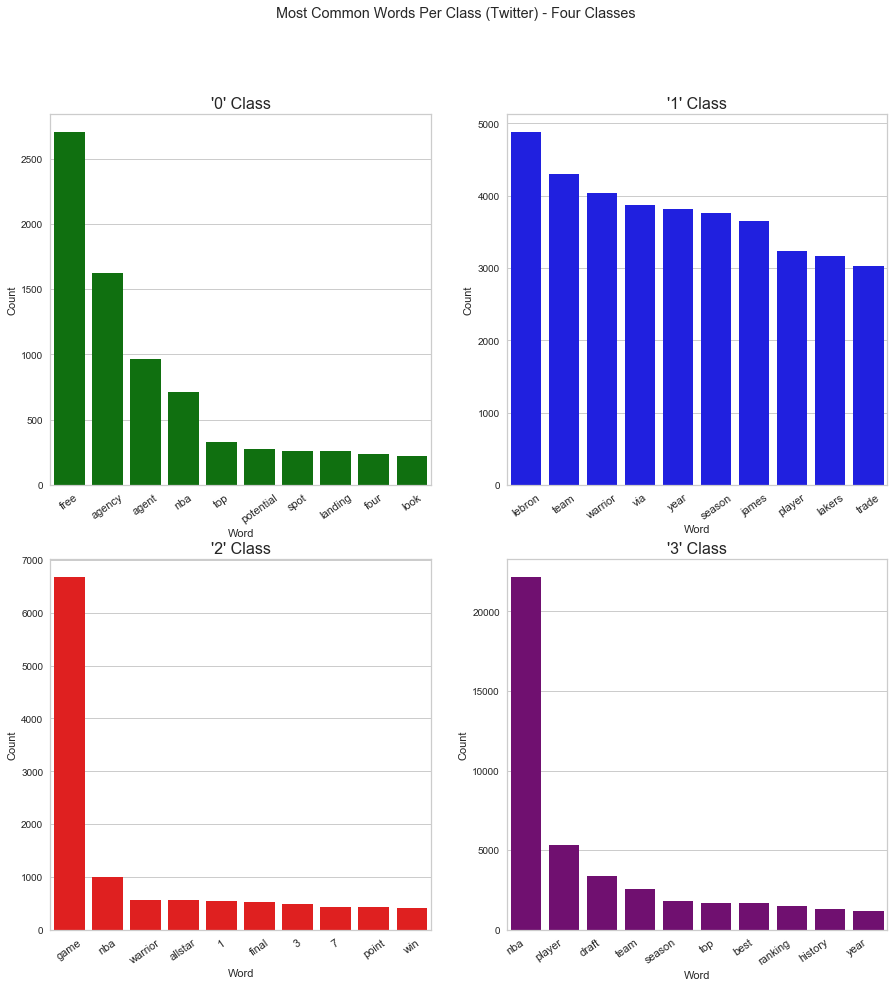

In [57]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.barplot(x=quad_zero_count_df['Word'][:10], y=quad_zero_count_df['Count'][:10], 
            data=quad_zero_count_df[:10], ax=axs[0, 0], color='green')
axs[0, 0].tick_params(axis='x', labelrotation=35, labelsize=11)

sns.barplot(x=quad_one_count_df['Word'][:10], y=quad_one_count_df['Count'][:10], 
            data=quad_one_count_df[:10], ax=axs[0, 1], color='blue')
axs[0, 1].tick_params(axis='x', labelrotation=35, labelsize=11)

sns.barplot(x=quad_two_count_df['Word'][:10], y=quad_two_count_df['Count'][:10], 
            data=quad_two_count_df[:10], ax=axs[1, 0], color='red')
axs[1, 0].tick_params(axis='x', labelrotation=35, labelsize=11)

sns.barplot(x=quad_three_count_df['Word'][:10], y=quad_three_count_df['Count'][:10], 
            data=quad_three_count_df[:10], ax=axs[1, 1], color='purple')
axs[1, 1].tick_params(axis='x', labelrotation=35, labelsize=11)


plt.suptitle('Most Common Words Per Class (Twitter) - Four Classes')
axs[0, 0].set_title("'0' Class", fontsize=16)
axs[0, 1].set_title("'1' Class", fontsize=16)
axs[1, 0].set_title("'2' Class", fontsize=16)
axs[1, 1].set_title("'3' Class", fontsize=16)
plt.xticks(horizontalalignment='right')
plt.savefig('twitter_most_common_words_4classes.png')

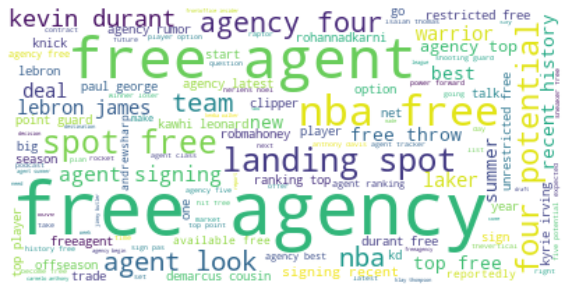

In [58]:
wc_twitter_quad_zero = WordCloud(background_color='white')
wc_twitter_quad_zero.generate(quad_zero_class_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_twitter_quad_zero, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_twitter_quad_zero.to_file('twitter_quad_zero_wordcloud.png')

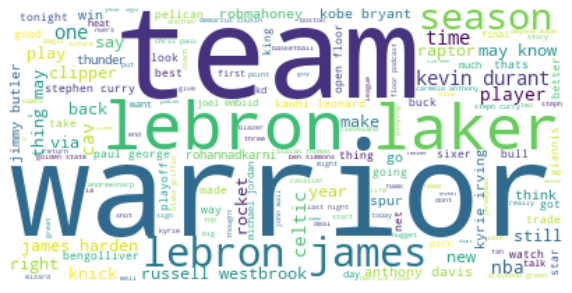

In [59]:
wc_twitter_quad_one = WordCloud(background_color='white')
wc_twitter_quad_one.generate(quad_one_class_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_twitter_quad_one, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_twitter_quad_one.to_file('twitter_quad_one_wordcloud.png')

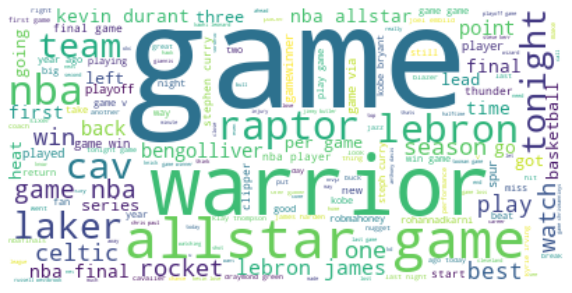

In [60]:
wc_twitter_quad_two = WordCloud(background_color='white')
wc_twitter_quad_two.generate(quad_two_class_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_twitter_quad_two, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_twitter_quad_two.to_file('twitter_quad_two_wordcloud.png')

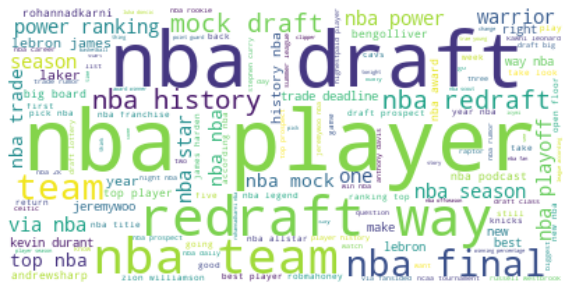

In [61]:
wc_twitter_quad_three = WordCloud(background_color='white')
wc_twitter_quad_three.generate(quad_three_class_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_twitter_quad_three, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_twitter_quad_three.to_file('twitter_quad_three_wordcloud.png')

## Five Clusters

In [62]:
kmeans_five = KMeans(n_clusters=5, random_state=123)
kmeans_five.fit(vec_matrix_pca_100)
twitter_df['five_labels'] = kmeans_five.labels_

In [63]:
twitter_df['five_labels'].value_counts()

2    98499
1    20803
4     3978
3     2715
0     2624
Name: five_labels, dtype: int64

In [64]:
twitter_df.loc[twitter_df['five_labels'] == 0].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,quad_labels,five_labels
24210,2019-02-25 19:13:02,2019 NBA draft: Cam Reddish's unpredictable game and more analysis on Duke's top prospects,SI,"[2019, nba, draft, cam, reddishs, unpredictable, game, analysis, duke, top, prospect, ]",0,0,3,0
103323,2018-06-10 15:28:28,Kevin Durant is already a Top (blank) player in basketball history.,HoopsHype,"[kevin, durant, already, top, blank, player, basketball, history]",1,2,1,0
91133,2020-03-09 04:00:37,Bar Races: These are the top international scorers in the NBA through the years.,HoopsHype,"[bar, race, top, international, scorer, nba, year, ]",0,0,3,0
30762,2018-09-10 18:30:11,Why Carmelo Anthony was left off the Top 100,SI,"[carmelo, anthony, left, top, 100, ]",1,2,1,0
114708,2017-03-24 14:26:04,Alex Kennedy: Top NBA players with bargain contracts.,HoopsHype,"[alex, kennedy, top, nba, player, bargain, contract, ]",0,0,3,0
55445,2016-11-15 18:43:17,Seven top-10 teams in action tonight.@andrewsharp's 13 freshmen every NBA fan needs to watch,SI,"[seven, top10, team, action, tonightandrewsharps, 13, freshman, every, nba, fan, need, watch, ]",0,0,3,0
118617,2016-09-28 08:27:02,FYI: There's eight active players in the Top 50 all-time scoring list.,HoopsHype,"[fyi, there, eight, active, player, top, 50, alltime, scoring, list, ]",0,0,3,0
6425,2019-02-02 16:44:48,These top 10 dunks from January are NASTY,Yahoo,"[top, 10, dunk, january, nasty, ]",1,2,1,0
12541,2016-09-14 14:00:07,".@TheVertical/@DraftExpress Prospect Breakdown: Potential top-10 pick, Cal F Ivan Rabb's strengt...",Yahoo,"[theverticaldraftexpress, prospect, breakdown, potential, top10, pick, cal, f, ivan, rabbs, stre...",1,2,1,0
45079,2017-09-11 09:07:20,Let the debates begin! Counting down the Top 100 NBA players of 2018,SI,"[let, debate, begin, counting, top, 100, nba, player, 2018, ]",0,0,3,0


In [65]:
twitter_df.loc[twitter_df['five_labels'] == 1].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,quad_labels,five_labels
107148,2018-01-22 05:40:39,"Stats porn: Last night in the NBA. Featuring Spencer Dinwiddie, Jordan Clarkson, Kyrie Irving...",HoopsHype,"[stats, porn, last, night, nba, featuring, spencer, dinwiddie, jordan, clarkson, kyrie, irving, ]",0,0,3,1
69929,2019-12-12 08:00:00,NEW NBA Daily Ding @DaveDuFourNBA is joined by @BigWos to recap a loaded Wednesday night in the ...,The Athletic,"[new, nba, daily, ding, davedufournba, joined, bigwos, recap, loaded, wednesday, night, nba, lis...",0,0,3,1
97352,2019-03-08 17:17:00,Which countries have the most NBA players per capita? (United States at No. 5).,HoopsHype,"[country, nba, player, per, caput, united, state, 5, ]",0,0,3,1
44200,2017-10-10 14:00:02,NBA scouts: Its hard to build a starting All-Star team to match up with the Warriors,SI,"[nba, scout, hard, build, starting, allstar, team, match, warrior, ]",0,0,3,1
109997,2017-09-21 12:30:07,Former NBPA VP Mo Evans believes role in lockout ended his NBA career.,HoopsHype,"[former, nbpa, vp, mo, evans, belief, role, lockout, ended, nba, career, ]",0,0,3,1
105124,2018-04-09 17:14:00,Who's the highest-paid player in the history of each NBA franchise?,HoopsHype,"[who, highestpaid, player, history, nba, franchise, ]",0,0,3,1
82479,2016-08-12 12:16:13,The 2016-17 NBA schedule came out yesterday! Here are the dates you really need to know.,SB Nation,"[201617, nba, schedule, came, yesterday, date, really, need, know, ]",0,0,3,1
17894,2019-09-20 13:41:08,LeBron James and The Decision set the tone for the next 10 years in the NBA. @andrewsharp on the...,SI,"[lebron, james, decision, set, tone, next, 10, year, nba, andrewsharp, ten, biggest, basketball,...",0,1,3,1
22541,2019-04-13 11:59:04,Need a viewers guide for the NBA playoffs? @aabdelda ranked the most (and least) watchable first...,SI,"[need, viewer, guide, nba, playoff, aabdelda, ranked, least, watchable, firstround, series, ]",0,0,3,1
14741,2020-06-23 09:10:03,Should the NBA relocate the bubble after coronavirus cases spike in Florida?,SI,"[nba, relocate, bubble, coronavirus, case, spike, florida, ]",0,0,3,1


In [66]:
twitter_df.loc[twitter_df['five_labels'] == 2].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,quad_labels,five_labels
99558,2018-11-16 10:30:00,"""Its like having three giants in the room when you have Joel, Jimmy and Ben. Its going to take t...",HoopsHype,"[like, three, giant, room, joel, jimmy, ben, going, take, time, know, everybodys, mindset, know,...",1,2,1,2
93565,2019-09-18 12:56:28,Isaiah Thomas to miss start of the season.,HoopsHype,"[isaiah, thomas, miss, start, season, ]",1,2,1,2
4802,2019-05-10 17:21:55,19 seasons in. 39 years old. Jamal Crawford can STILL get busy,Yahoo,"[19, season, 39, year, old, jamal, crawford, still, get, busy, ]",1,2,1,2
24064,2019-02-28 20:33:39,D-Wade still feeling himself after last night,SI,"[dwade, still, feeling, last, night, ]",1,2,1,2
88952,2020-08-09 17:30:52,Injuries and all.,HoopsHype,[injury],1,2,1,2
89910,2020-06-05 19:30:24,We have a winner.,HoopsHype,[winner],1,2,1,2
94024,2019-08-23 17:28:29,Dwight Howard to Lakers.,HoopsHype,"[dwight, howard, lakers, ]",1,2,1,2
119032,2016-09-09 11:10:24,Charles Barkley? Who?,HoopsHype,"[charles, barkley, ]",1,2,1,2
118001,2016-10-27 09:17:11,Jaylen Brown's dunk attempt goes all kinds of wrong.,HoopsHype,"[jaylen, brown, dunk, attempt, go, kind, wrong, ]",1,2,1,2
8619,2018-06-05 22:45:08,"Kendrick Perkins on Stephen Curry altercation: ""I don't think I'm the problem that they want.""",Yahoo,"[kendrick, perkins, stephen, curry, altercation, dont, think, im, problem, want, ]",1,2,1,2


In [67]:
twitter_df.loc[twitter_df['five_labels'] == 3].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,quad_labels,five_labels
26049,2019-01-14 10:25:13,NBA free agency is not always your friend,SI,"[nba, free, agency, always, friend, ]",0,0,0,3
96002,2019-05-17 13:33:29,Four potential Tobias Harris landing spots in free agency.,HoopsHype,"[four, potential, tobias, harris, landing, spot, free, agency, ]",1,2,0,3
104802,2018-04-23 06:00:15,NBA Free Agency 2018: The best power forwards available.,HoopsHype,"[nba, free, agency, 2018, best, power, forward, available, ]",0,0,0,3
56287,2016-10-14 14:23:22,NBA free agency 2017: Players set to cash in next summer (by @RohanNadkarni),SI,"[nba, free, agency, 2017, player, set, cash, next, summer, rohannadkarni, ]",0,0,0,3
127746,2019-06-30 15:27:09,"Kevin Durant will announce his free agency decision tonight, @WojESPN reports. Get a concise rou...",Slam,"[kevin, durant, announce, free, agency, decision, tonight, wojespn, report, get, concise, roundu...",1,2,0,3
19499,2019-07-10 09:07:03,The NBA needs to address its free agency problemand Adam Silver knows it,SI,"[nba, need, address, free, agency, problemand, adam, silver, know, ]",0,0,0,3
20476,2019-06-13 10:05:05,Kevin Durant will still seek a long-term contract in free agency following his Achilles injury o...,SI,"[kevin, durant, still, seek, longterm, contract, free, agency, following, achilles, injury, mond...",1,2,0,3
72002,2018-10-08 08:37:38,Its not the craziest dream. Durant has a wandering eye and the #Knicks believe they have a punch...,The Athletic,"[craziest, dream, durant, wandering, eye, knicks, believe, puncher, chance, sign, thefrankisola,...",1,2,0,3
47087,2017-07-04 07:00:18,2017 NBA free agent tracker: Follow every move,SI,"[2017, nba, free, agent, tracker, follow, every, move, ]",0,0,0,3
111751,2017-07-10 07:08:06,Our look at Boston-bound free agent Aron Baynes.,HoopsHype,"[look, bostonbound, free, agent, aron, baynes, ]",1,2,0,3


In [68]:
twitter_df.loc[twitter_df['five_labels'] == 4].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,quad_labels,five_labels
21244,2019-05-21 09:04:03,NBA Mock Draft 8.0: Who helped themselves the most at the combine? @JeremyWoo projects all 60 pi...,SI,"[nba, mock, draft, 80, helped, combine, jeremywoo, project, 60, pick, ]",0,0,3,4
89146,2020-07-29 10:34:03,2020 aggregate NBA mock draft 6.0: Scouting the projected lottery.,HoopsHype,"[2020, aggregate, nba, mock, draft, 60, scouting, projected, lottery, ]",0,0,3,4
28185,2018-11-16 07:01:01,NBA draft watch: USC freshman Kevin Porter jr. deserves your attention after impressing start,SI,"[nba, draft, watch, usc, freshman, kevin, porter, jr, deserves, attention, impressing, start, ]",0,0,3,4
104036,2018-05-20 10:00:10,2018 NBA pre-draft workouts: Who's going where.,HoopsHype,"[2018, nba, predraft, workout, who, going, ]",0,0,3,4
90507,2020-04-29 00:18:10,NBA draft early entries: Who's going pro?,HoopsHype,"[nba, draft, early, entry, who, going, pro, ]",0,0,3,4
58880,2016-06-23 08:27:32,"NBA draft rumors: Latest buzz on Dragan Bender, Jamal Murray, trades and more",SI,"[nba, draft, rumor, latest, buzz, dragan, bender, jamal, murray, trade, ]",0,0,3,4
109127,2017-10-27 04:00:10,2013 NBA re-draft: The way it should have been.,HoopsHype,"[2013, nba, redraft, way, ]",0,0,3,4
105626,2018-03-19 10:00:08,2003 NBA re-draft: The way it should have been.,HoopsHype,"[2003, nba, redraft, way, ]",0,0,3,4
21169,2019-05-23 01:49:03,"With Twitter and Facebook at the peak of their powers, social media is ever present in the NBA d...",SI,"[twitter, facebook, peak, power, social, medium, ever, present, nba, draft, process, team, prosp...",0,0,3,4
50670,2017-04-05 13:45:08,NBA Mock Draft 3.0: Who were the NCAA tournament's biggest winners?,SI,"[nba, mock, draft, 30, ncaa, tournament, biggest, winner, ]",0,0,3,4


In [69]:
twitter_zero = twitter_df.loc[twitter_df['five_labels'] == 0]
twitter_one = twitter_df.loc[twitter_df['five_labels'] == 1]
twitter_two = twitter_df.loc[twitter_df['five_labels'] == 2]
twitter_three = twitter_df.loc[twitter_df['five_labels'] == 3]
twitter_four = twitter_df.loc[twitter_df['five_labels'] == 4]

zero_class_text = []
for element in twitter_zero['tweet_tokens']:
    for word in element:
        zero_class_text.append(word)
        
zero_class_text  = [x for x in zero_class_text if x != '']
zero_class_str = ' '.join(zero_class_text)
zero_dict = Counter(zero_class_text)

one_class_text = []
for element in twitter_one['tweet_tokens']:
    for word in element:
        one_class_text.append(word)
        
one_class_text  = [x for x in one_class_text if x != '']
one_class_str = ' '.join(one_class_text)
one_dict = Counter(one_class_text)

two_class_text = []
for element in twitter_two['tweet_tokens']:
    for word in element:
        two_class_text.append(word)

two_class_text  = [x for x in two_class_text if x != '']        
two_class_str = ' '.join(two_class_text)
two_dict = Counter(two_class_text)

three_class_text = []
for element in twitter_three['tweet_tokens']:
    for word in element:
        three_class_text.append(word)

three_class_text  = [x for x in three_class_text if x != '']
three_class_str = ' '.join(three_class_text)
three_dict = Counter(three_class_text)

four_class_text = []
for element in twitter_four['tweet_tokens']:
    for word in element:
        four_class_text.append(word)
        
four_class_text  = [x for x in four_class_text if x != '']        
four_class_str = ' '.join(four_class_text)
four_dict = Counter(four_class_text)




In [70]:
zero_sorted = dict(sorted(zero_dict.items(), key=lambda item: item[1], reverse=True)) 
one_sorted = dict(sorted(one_dict.items(), key=lambda item: item[1], reverse=True))
two_sorted = dict(sorted(two_dict.items(), key=lambda item: item[1], reverse=True))
three_sorted = dict(sorted(three_dict.items(), key=lambda item: item[1], reverse=True))
four_sorted = dict(sorted(four_dict.items(), key=lambda item: item[1], reverse=True))

zero_count_df = pd.DataFrame.from_dict(zero_sorted, orient='index', columns=['Count'])
zero_count_df.reset_index(inplace=True)
zero_count_df.rename(columns={'index':'Word'}, inplace=True)

one_count_df = pd.DataFrame.from_dict(one_sorted, orient='index', columns=['Count'])
one_count_df.reset_index(inplace=True)
one_count_df.rename(columns={'index':'Word'}, inplace=True)

two_count_df = pd.DataFrame.from_dict(two_sorted, orient='index', columns=['Count'])
two_count_df.reset_index(inplace=True)
two_count_df.rename(columns={'index':'Word'}, inplace=True)

three_count_df = pd.DataFrame.from_dict(three_sorted, orient='index', columns=['Count'])
three_count_df.reset_index(inplace=True)
three_count_df.rename(columns={'index':'Word'}, inplace=True)

four_count_df = pd.DataFrame.from_dict(four_sorted, orient='index', columns=['Count'])
four_count_df.reset_index(inplace=True)
four_count_df.rename(columns={'index':'Word'}, inplace=True)

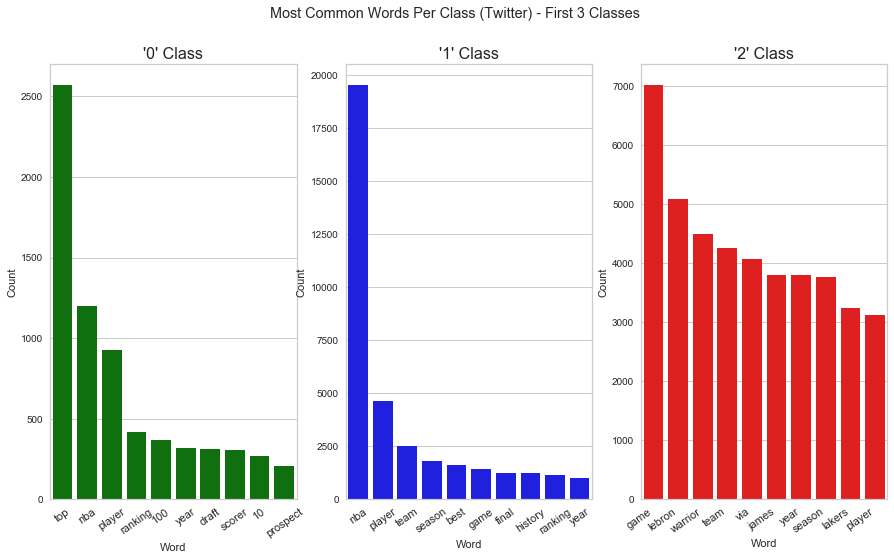

In [71]:
import seaborn as sns
fig, axs = plt.subplots(1, 3, figsize=(15, 8))
sns.barplot(x=zero_count_df['Word'][:10], y=zero_count_df['Count'][:10], 
            data=zero_count_df[:10], ax=axs[0], color='green')
axs[0].tick_params(axis='x', labelrotation=35, labelsize=11)

sns.barplot(x=one_count_df['Word'][:10], y=one_count_df['Count'][:10], 
            data=one_count_df[:10], ax=axs[1], color='blue')
axs[1].tick_params(axis='x', labelrotation=35, labelsize=11)

sns.barplot(x=two_count_df['Word'][:10], y=two_count_df['Count'][:10], 
            data=two_count_df[:10], ax=axs[2], color='red')
axs[2].tick_params(axis='x', labelrotation=35, labelsize=11)

plt.suptitle('Most Common Words Per Class (Twitter) - First 3 Classes')
axs[0].set_title("'0' Class", fontsize=16)
axs[1].set_title("'1' Class", fontsize=16)
axs[2].set_title("'2' Class", fontsize=16)
plt.xticks(horizontalalignment='right')
plt.savefig('twitter_most_common_words_first_three_classes.png')

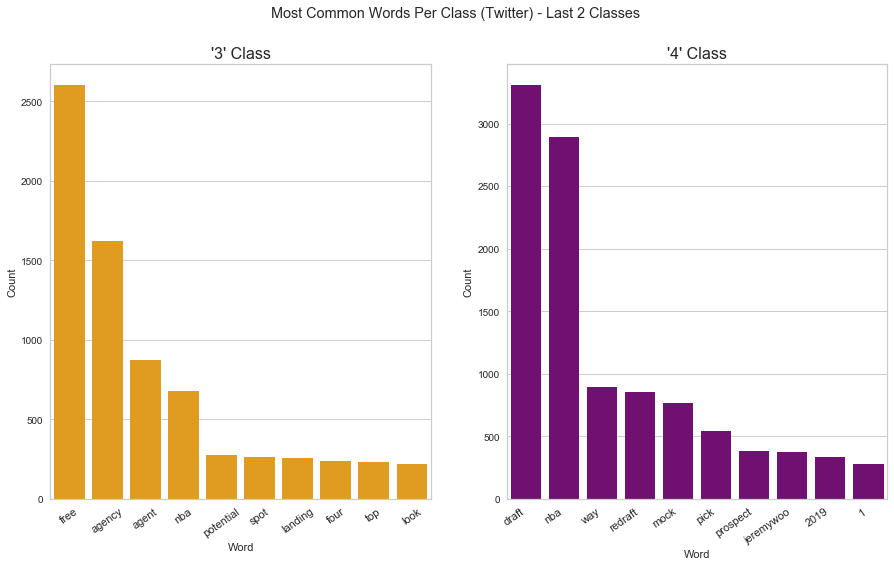

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x=three_count_df['Word'][:10], y=three_count_df['Count'][:10], 
            data=three_count_df[:10], ax=axs[0], color='orange')
axs[0].tick_params(axis='x', labelrotation=35, labelsize=11)

sns.barplot(x=four_count_df['Word'][:10], y=four_count_df['Count'][:10], 
            data=four_count_df[:10], ax=axs[1], color='purple')
axs[1].tick_params(axis='x', labelrotation=35, labelsize=11)


plt.suptitle('Most Common Words Per Class (Twitter) - Last 2 Classes')
axs[0].set_title("'3' Class", fontsize=16)
axs[1].set_title("'4' Class", fontsize=16)
plt.xticks(horizontalalignment='right')
plt.savefig('twitter_most_common_words_last_two_classes.png')

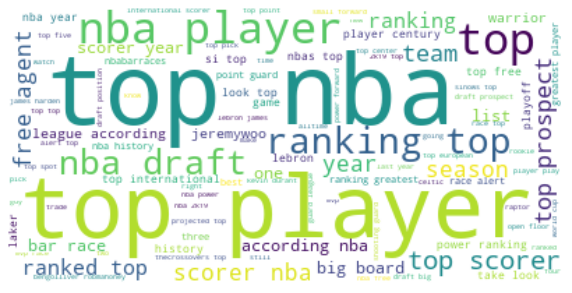

In [73]:
wc_twitter_class_zero = WordCloud(background_color='white')
wc_twitter_class_zero.generate(zero_class_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_twitter_class_zero, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_twitter_class_zero.to_file('twitter_zero_wordcloud.png')

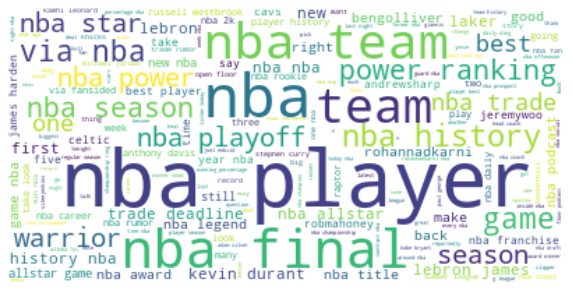

In [74]:
wc_twitter_class_one = WordCloud(background_color='white')
wc_twitter_class_one.generate(one_class_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_twitter_class_one, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_twitter_class_one.to_file('twitter_one_wordcloud.png')

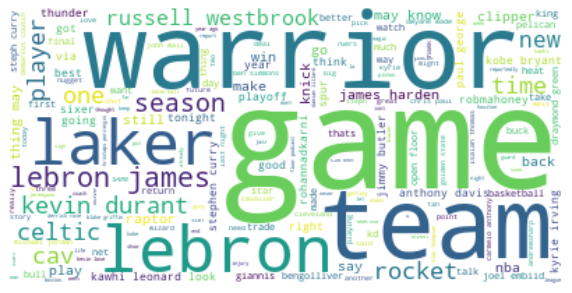

In [75]:
wc_twitter_class_two = WordCloud(background_color='white')
wc_twitter_class_two.generate(two_class_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_twitter_class_two, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_twitter_class_two.to_file('twitter_two_wordcloud.png')

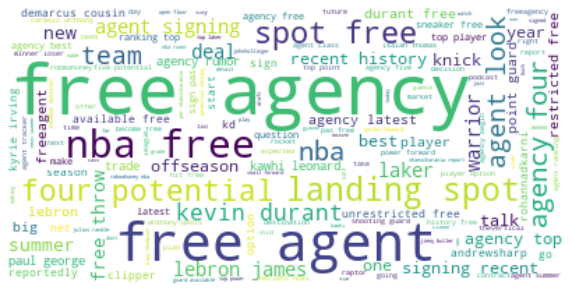

In [76]:
wc_twitter_class_three = WordCloud(background_color='white')
wc_twitter_class_three.generate(three_class_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_twitter_class_three, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_twitter_class_zero.to_file('twitter_three_wordcloud.png')

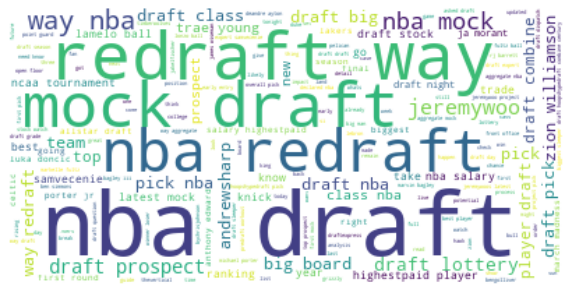

In [77]:
wc_twitter_class_four = WordCloud(background_color='white')
wc_twitter_class_four.generate(four_class_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_twitter_class_four, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_twitter_class_four.to_file('twitter_four_wordcloud.png')

In [78]:
def count_player_mentions(text):
    text_string = text
    
    lebron_count = 0
    curry_count = 0
    harden_count = 0
    kd_count = 0
    kyrie_count = 0
    dame_count = 0
    luka_count = 0
    zion_count = 0
    ja_count = 0
    giannis_count = 0
    
    if text_string.count('LeBron') > 0 or text_string.count('LBJ') > 0 or text_string.count('King James') > 0:
        lebron_count += 1
    
    if text_string.count('Curry') > 0 or text_string.count('Stephen') > 0 or text_string.count('Steph') > 0:
        curry_count += 1
    
    if text_string.count('James Harden') > 0 or text_string.count('Harden') > 0:
        harden_count += 1
        
    if text_string.count('Kevin Durant') > 0 or text_string.count('Durant') > 0 or text_string.count('KD') > 0:
        kd_count += 1
        
    if (text_string.count('Kyrie Irving') > 0 or text_string.count('Irving') > 0 
        or text_string.count('Kyrie') > 0):
        kyrie_count += 1
        
    if (text_string.count('Damian Lillard') > 0 or text_string.count('Lillard') > 0 
        or text_string.count('Dame') > 0):
        dame_count += 1
    
    if text_string.count('Luka Doncic') > 0 or text_string.count('Luka') > 0 or text_string.count('Doncic') > 0:
        luka_count += 1
        
    if (text_string.count('Zion Williamson') > 0 or text_string.count('Williamson') > 0 
        or text_string.count('Zion') >0):
        zion_count += 1
        
    if text_string.count('Ja Morant') > 0 or text_string.count('Morant') > 0 or text_string.count('Ja '):
        ja_count += 1
        
    if (text_string.count('Giannis') > 0 or text_string.count('Antetokounmpo') > 0 
        or text_string.count('Greek Freak') > 0):
        giannis_count += 1
        
    return [lebron_count, curry_count, harden_count, kd_count, 
            kyrie_count, dame_count, luka_count, zion_count, ja_count, giannis_count]

In [79]:
def team_mentions_count(text):
    text_str = text
    
    atl_count = 0
    boston_count = 0
    brooklyn_count = 0
    charlotte_count = 0
    chicago_count = 0
    cleveland_count = 0
    dallas_count = 0
    denver_count = 0
    detroit_count = 0
    gsw_count = 0
    houston_count = 0
    indiana_count = 0
    clippers_count = 0
    lakers_count = 0
    memphis_count = 0
    miami_count = 0
    bucks_count = 0
    minn_count = 0
    pelicans_count = 0
    knicks_count = 0
    okc_count = 0
    orlando_count = 0
    philly_count = 0
    phoenix_count = 0
    portland_count = 0
    sac_count = 0
    spurs_count = 0
    raptors_count = 0
    utah_count = 0
    wizards_count = 0
    
    if text_str.count('Atlanta') > 0 or text_str.count('ATL') > 0 or text_str.count('Hawks') > 0:
        atl_count += 1
        
    if text_str.count('Boston') > 0 or text_str.count('Celtics') > 0:
        boston_count += 1
        
    if text_str.count('Brooklyn') > 0 or text_str.count('Nets') > 0:
        brooklyn_count += 1
        
    if text_str.count('Charlotte') > 0 or text_str.count('Hornets') > 0:
        charlotte_count += 1
        
    if text_str.count('Chicago') > 0 or text_str.count('Bulls') > 0 or text_str.count('Windy City') > 0:
        chicago_count += 1
        
    if text_str.count('Cleveland') > 0 or text_str.count('Cavaliers') > 0 or text_str.count('Cavs') > 0:
        cleveland_count += 1
        
    if text_str.count('Dallas') > 0 or text_str.count('Mavericks') > 0 or text_str.count('Mavs') > 0:
        dallas_count += 1
        
    if text_str.count('Denver') > 0 or text_str.count('Nuggets') > 0:
        denver_count += 1
        
    if text_str.count('Detroit') > 0 or text_str.count('Pistons') > 0 or text_str.count('Motor City') > 0:
        detroit_count += 1
        
    if text_str.count('Golden State') > 0 or text_str.count('Warriors') > 0 or text_str.count('GSW') > 0:
        gsw_count += 1
        
    if text_str.count('Houston') > 0 or text_str.count('Rockets') > 0 or text_str.count('H-Town') > 0:
        houston_count += 1
        
    if text_str.count('Indiana') > 0 or text_str.count('Pacers') > 0:
        indiana_count += 1
        
    if text_str.count('Clippers') > 0 or text_str.count('LAC') > 0 or text_str.count('Clips') > 0:
        clippers_count += 1
        
    if text_str.count('Lakers') > 0 or text_str.count('LAL') > 0:
        lakers_count += 1
        
    if text_str.count('Memphis') > 0 or text_str.count('Grizzlies') > 0:
        memphis_count += 1
        
    if text_str.count('Miami') > 0 or text_str.count('Heat') > 0:
        miami_count += 1
        
    if text_str.count('Milwaukee') > 0 or text_str.count('Bucks') > 0:
        bucks_count += 1
        
    if text_str.count('New Orleans') > 0 or text_str.count('Pelicans') > 0 or text_str.count('NOP') > 0:
        pelicans_count += 1
        
    if text_str.count('NYK') > 0 or text_str.count('Knicks') > 0 or text_str.count('New York') > 0:
        knicks_count += 1
        
    if (text_str.count('OKC') > 0 or text_str.count('Thunder') > 0 or 
        text_str.count('Oklahoma City Thunder')) > 0:
        okc_count += 1
        
    if text_str.count('Orlando') > 0 or text_str.count('Magic') > 0:
        orlando_count += 1
        
    if (text_str.count('Philadelphia') > 0 or text_str.count('76ers') > 0 or text_str.count('Sixers') > 0 
        or text_str.count('Philly') > 0):
        philly_count += 1
        
    if text_str.count('Phoenix') > 0 or text_str.count('Suns') > 0:
        phoenix_count += 1
        
    if text_str.count('Portland') > 0 or text_str.count('Trailblazers') > 0 or text_str.count('Blazers'):
        portland_count += 1
        
    if text_str.count('Sacramento') > 0 or text_str.count('Kings') > 0:
        sac_count += 1
        
    if text_str.count('San Antonio') > 0 or text_str.count('Spurs') > 0:
        spurs_count += 1
        
    if text_str.count('Toronto') > 0 or text_str.count('Raptors') > 0 or text_str.count('Jurassic Park') > 0:
        raptors_count += 1
        
    if text_str.count('Utah') > 0 or text_str.count('Jazz') > 0 or text_str.count('Salt Lake City') > 0:
        utah_count += 1
        
    if text_str.count('Washington') > 0 or text_str.count('Wizards') > 0 or text_str.count('DC') > 0:
        wizards_count += 1
        
    return [atl_count, boston_count, brooklyn_count, charlotte_count , chicago_count, cleveland_count,
            dallas_count, denver_count, detroit_count, gsw_count, houston_count, indiana_count,
            clippers_count, lakers_count, memphis_count, miami_count, bucks_count, minn_count, pelicans_count,
            knicks_count, okc_count, orlando_count, philly_count, phoenix_count, portland_count, sac_count,
            spurs_count, raptors_count, utah_count, wizards_count]

In [80]:
tweets_list = list(twitter_df['tweet'])

In [81]:
twitter_player_mentions_count = [count_player_mentions(tweet_text) for tweet_text in tweets_list]

twitter_player_mentions_df = pd.DataFrame(twitter_player_mentions_count, 
                                  columns=['Lebron', 'Steph', 'Harden', 'KD', 
                                           'Kyrie','Dame','Luka','Zion','Ja','Giannis'])

In [82]:
twitter_team_mention_count = [team_mentions_count(tweet_text) for tweet_text in tweets_list]
twitter_team_mentions_df = pd.DataFrame(twitter_team_mention_count, 
                                        columns=['ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL','DEN', 
                                                 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 
                                                 'MIL', 'MIN', 'NOP', 'NYK', 'OKC','ORL', 'PHI', 'PHX', 
                                                 'POR', 'SAC', 'SAT', 'TOR', 'UTAH', 'WAS'])

In [83]:
twitter_player_mentions_df.to_csv('twitter_player_mentions.csv', index=False)
twitter_team_mentions_df.to_csv('twitter_team_mentions.csv', index=False)

In [84]:
twitter_df.to_csv('nba_twitter.csv', index=False)

## Silhouette Scores

In [ ]:
df = pd.read_csv('nba_twitter.csv')
df.dropna(inplace=True)

vec = TfidfVectorizer()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(18,10))
sub_coords = [(0,0), (0,1), (1,0), (1,1)]
clusters = [2, 3, 4, 5]
for i in range(0, len(clusters)):
    
    km = KMeans(n_clusters=clusters[i], random_state=123)

    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[sub_coords[i][0]][sub_coords[i][1]])
    visualizer.fit()
    ax[sub_coords[i][0]][sub_coords[i][1]].set_title(f'{clusters[i]} Clusters')
    
plt.savefig('tweets_silhouette_plot.png')